In [14]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
(xTrain, yTrain), (xVal, _) = mnist.load_data()
xTrain = xTrain[:10000]
xTrain, xVal = xTrain.reshape(10000,784)/255., xVal.reshape(10000,784)/255.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(xTrain)

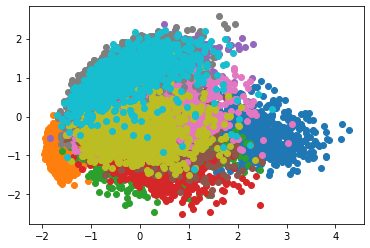

In [16]:
reduction = pca.transform(xTrain)
reduction = (reduction-reduction.mean())/reduction.std()

x = [ [] for i in range(10)]
y = [ [] for i in range(10)]
for i in range(10000):
    x[ yTrain[i] ].append( reduction[i][0] )
    y[ yTrain[i] ].append( reduction[i][1] )
    
plt.scatter(x[0], y[0]) # blue
plt.scatter(x[1], y[1]) # orange
plt.scatter(x[2], y[2]) # green
plt.scatter(x[3], y[3]) # red
plt.scatter(x[4], y[4]) # purple
plt.scatter(x[5], y[5]) # brown
plt.scatter(x[6], y[6]) # pink
plt.scatter(x[7], y[7]) # grey
plt.scatter(x[8], y[8]) # yellow
plt.scatter(x[9], y[9]) # cyan
plt.show()

In [7]:
from sklearn.manifold import TSNE
reduction = TSNE(n_components=2).fit_transform(xTrain)
reduction = (reduction-reduction.mean())/reduction.std()

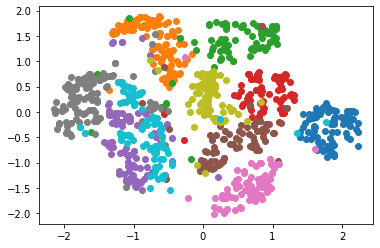

In [8]:
x = [ [] for i in range(10)]
y = [ [] for i in range(10)]
for i in range(1000):
    x[ yTrain[i] ].append( reduction[i][0] )
    y[ yTrain[i] ].append( reduction[i][1] )

plt.scatter(x[0], y[0]) # blue
plt.scatter(x[1], y[1]) # orange
plt.scatter(x[2], y[2]) # green
plt.scatter(x[3], y[3]) # red
plt.scatter(x[4], y[4]) # purple
plt.scatter(x[5], y[5]) # brown
plt.scatter(x[6], y[6]) # pink
plt.scatter(x[7], y[7]) # grey
plt.scatter(x[8], y[8]) # yellow
plt.scatter(x[9], y[9]) # cyan
plt.show()

In [9]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Lambda 
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import mse
from keras import backend as K

In [10]:
def sampling(args): # z=z_mean+sqrt(var)*epsilon # args(tensor): mean & log of variance of Q(z|X)
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]   # tensor
    dim = K.int_shape(z_mean)[1] # 2
    epsilon = K.random_normal(shape=(batch, dim), mean=0, stddev=1)
    return z_mean + epsilon * K.exp(0.5*z_log_var)

inputL = Input(shape=(784,))
x = Dense(512, activation='relu')(inputL)
z_mean = Dense(2, name='z_mean')(x)
z_log_var = Dense(2, name='z_log_var')(x)
z = Lambda(sampling, output_shape=(2,), name='z')([z_mean, z_log_var])
encoder = Model(inputL, [z_mean, z_log_var, z], name='Encoder')
encoder.summary(); print("\n\n")

dInputL = Input(shape=(2,))
x = Dense(512, activation='relu')(dInputL)
outputL = Dense(784, activation='sigmoid')(x)
decoder = Model(dInputL, outputL, name='Decoder')
decoder.summary(); print("\n\n")

outputL = decoder(z) # decoder model connect to z. View whole decoder as a layer called outputL
vae = Model(inputL, outputL, name="VAE")
vae.summary()

reconstruction_loss = 784*mse(inputL, outputL)
kl_loss = -0.5*K.sum( 1+z_log_var-K.square(z_mean)-K.exp(z_log_var), axis=-1)
vae.add_loss( K.mean(reconstruction_loss+kl_loss) )
vae.compile(optimizer=Adam(lr=0.0001))

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          401920      input_1[0][0]                    
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_1[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_1[0][0]                    
____________________________________________________________________________________________

c:\users\bnbsking\miniconda3\envs\tensorflow\lib\site-packages\keras\engine\training_utils.py:819: UserWarning: Output Decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to Decoder.
  'be expecting any data to be passed to {0}.'.format(name))


In [17]:
history = vae.fit(xTrain, None, epochs=50, batch_size=128, validation_data=(xVal, None))


Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 1s 123us/step - loss: 155.7447 - val_loss: 112.6961
Epoch 2/50
10000/10000 [==============================] - 1s 112us/step - loss: 91.2260 - val_loss: 79.1731
Epoch 3/50
10000/10000 [==============================] - 1s 106us/step - loss: 73.5024 - val_loss: 69.2498
Epoch 4/50
10000/10000 [==============================] - 1s 107us/step - loss: 65.9328 - val_loss: 63.4143
Epoch 5/50
10000/10000 [==============================] - 1s 110us/step - loss: 61.3080 - val_loss: 59.8680
Epoch 6/50
10000/10000 [==============================] - 1s 107us/step - loss: 58.3139 - val_loss: 57.5545
Epoch 7/50
10000/10000 [==============================] - 1s 102us/step - loss: 56.2978 - val_loss: 55.8466
Epoch 8/50
10000/10000 [==============================] - 1s 105us/step - loss: 54.7712 - val_loss: 54.5674
Epoch 9/50
10000/10000 [==============================] - 1s 107us/step - loss: 53.

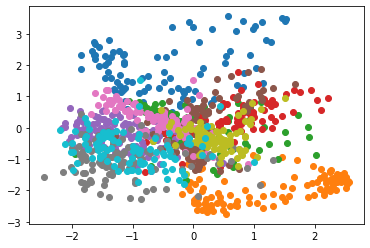

In [24]:
reduction, _, _ = encoder.predict(xTrain)

x = [ [] for i in range(10)]
y = [ [] for i in range(10)]
for i in range(1000):
    x[ yTrain[i] ].append( reduction[i][0] )
    y[ yTrain[i] ].append( reduction[i][1] )

plt.scatter(x[0], y[0]) # blue
plt.scatter(x[1], y[1]) # orange
plt.scatter(x[2], y[2]) # green
plt.scatter(x[3], y[3]) # red
plt.scatter(x[4], y[4]) # purple
plt.scatter(x[5], y[5]) # brown
plt.scatter(x[6], y[6]) # pink
plt.scatter(x[7], y[7]) # grey
plt.scatter(x[8], y[8]) # yellow
plt.scatter(x[9], y[9]) # cyan
plt.show()